In [77]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
import sklearn.tree
import sklearn.ensemble
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data_train_read = pd.read_csv("train.csv")
data_test_read = pd.read_csv("test.csv")

In [58]:
data_train = data_train_read.copy()

In [59]:
data_test = data_test_read.copy()

In [35]:
table = data_train.corr()

In [36]:
#print table.head(12)
#print data.columns[[10, 11]]

tv = table.values
edges = []
for i in range(len(tv)):
    for j in range(i + 1, len(tv) - 1):
        if np.abs(tv[i][j]) > .97:
            edges.append([i, j])

print len(edges)

202


In [37]:
vertices = {}
for e in edges:
    vertices[e[0]] = True
    vertices[e[1]] = True
    
vertices = vertices.keys()
do_not_del = [False] * len(vertices)
power = [0] * len(vertices)
to_del = []
for edge in edges:
    power[vertices.index(edge[0])] += 1
    power[vertices.index(edge[1])] += 1
# print pd.DataFrame(data={"K":power})["K"].value_counts()
for i in range(len(vertices)):
    if power[i] >= 5:
        to_del.append(vertices[i])
        
to_del = data_train.columns[to_del]

In [38]:
for cur in to_del:
    del data_train[cur]
    del data_test[cur]

In [60]:
X_train = data_train[data_train.columns[1:len(data_train.columns) - 1]]
y_train = data_train['TARGET']

In [75]:
clf = xgb.XGBRegressor(nthread=4, 
                       max_depth=8, 
                       n_estimators=30, 
                       subsample=0.5, 
                       learning_rate=0.1, 
                       seed=228)

In [76]:
scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3)
print scores.mean()

0.825269058877
CPU times: user 5min 38s, sys: 2.92 s, total: 5min 41s
Wall time: 1min 39s


# Найти нормальные значения n_est learing_rate для того, чтобы запускать KFold

## Wall time: 4min 17s 
### n_est=150, learing_rate=0.06
### ok

## Wall time: 2min 34s
### n_est=100, learing_rate=0.1
#### 1337->0.814105354026
#### 228 ->0.816250075442

## Wall time: 55.8 s
### n_est=30, learning_rate=0.1
#### 228->0.83113778196
#### 1337->0.829493695636

## Wall time: 1min 20 s
### n_est=50, learning_rate=0.1
#### 228->0.827046894815
#### 1337->0.824907872251



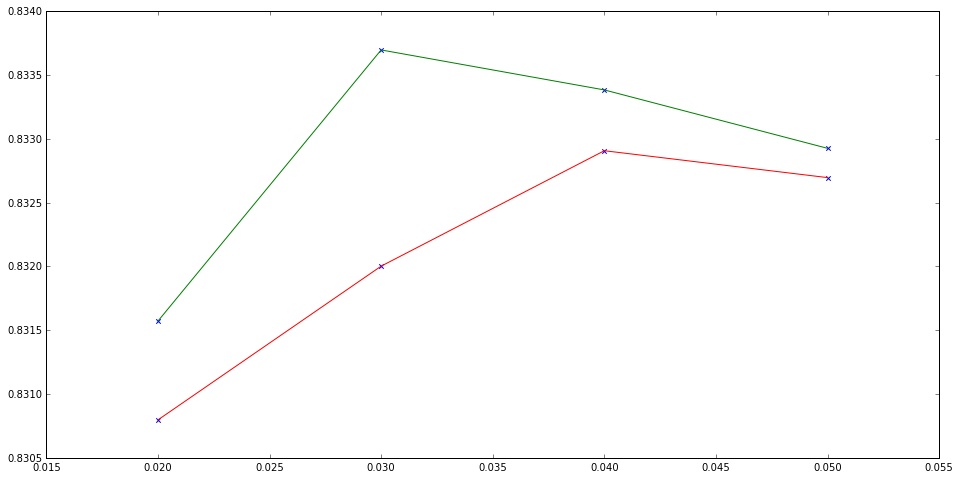

In [90]:
lr = np.linspace(0.02, 0.05, 4)
f = []
s = []
for lr_ in lr:
    clf = xgb.XGBRegressor(nthread=4, 
                       max_depth=8, 
                       n_estimators=30, 
                       subsample=0.5, 
                       learning_rate=lr_, 
                       seed=1337)
    scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3)
    f.append(scores.mean())
    clf = xgb.XGBRegressor(nthread=4, 
                       max_depth=8, 
                       n_estimators=30, 
                       subsample=0.5, 
                       learning_rate=lr_, 
                       seed=228)
    scores = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3)
    s.append(scores.mean())

plt.figure(figsize=(16, 8))
plt.plot(lr, f, color='r')
plt.scatter(lr, f, marker='x')
plt.plot(lr, s, color='g')
plt.scatter(lr, s, marker='x')
plt.show()

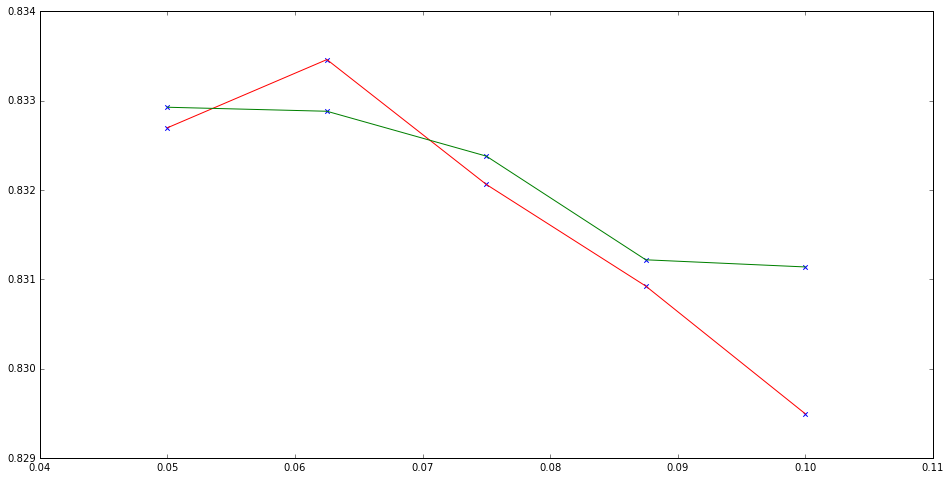

In [89]:
plt.figure(figsize=(16, 8))
plt.plot(lr, f, color='r')
plt.scatter(lr, f, marker='x')
plt.plot(lr, s, color='g')
plt.scatter(lr, s, marker='x')
plt.show()

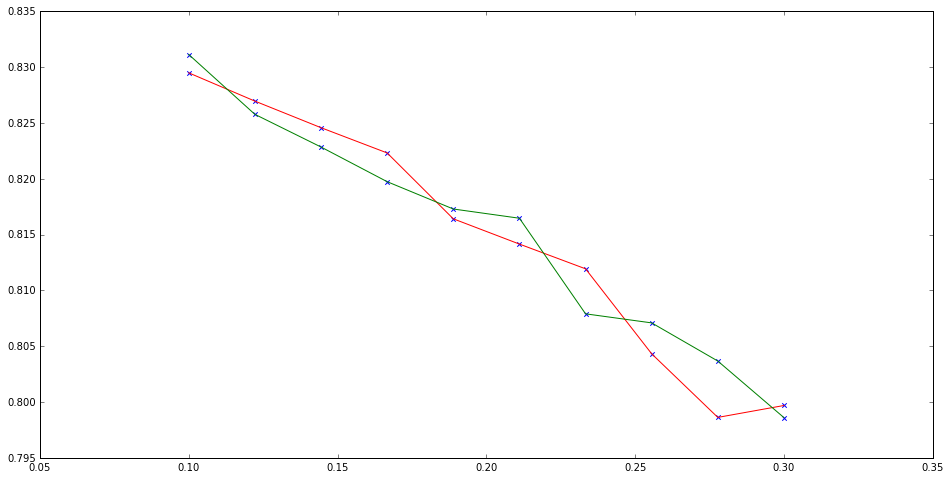

In [85]:
plt.figure(figsize=(16, 8))
plt.plot(lr, f, color='r')
plt.scatter(lr, f, marker='x')
plt.plot(lr, s, color='g')
plt.scatter(lr, s, marker='x')
plt.show()

# Норм решение - 30 n_est, 0.05 lr !!!

learning rate=0.006 был, сейчас работаем с 0.06
# Граф, удаляем 1: 0.828266253987
### learning_rate=0.06 
### 5, 6 -> 0.829583118157
### seed=228 -> 0.833233596118
### n_estimators=150, seed=228->0.82208934218, seed=1337->0.822197134319 - Норм))0)
# Без графа + минмакс: 0.82961981754
### learning_rate=0.06 -> 0.832801251368
### seed=228 -> 0.832362544101

# Удалить константы  и дубликаты -> 0.82362770529


# Оставить все как было -> 0.822325965941

In [35]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.006, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1337, silent=True, subsample=0.5)

In [36]:
X_test = data_test[data_test.columns[1:]]

In [37]:
y_test = clf.predict(X_test)

In [1]:
trash_count = 0
for i in range(len(y_test)):
    if y_test[i] < 0:
        y_test[i] = 0
        trash_count += 1
    if y_test[i] > 1:
        y_test[i] = 1
        trash_count += 1
print trash_count
ans = pd.DataFrame(index=data_test['ID'], data={'TARGET': y_test})
ans.to_csv('kek.csv')

NameError: name 'y_test' is not defined

In [11]:
min_max_scaler = pp.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [4]:
pd.DataFrame(X_train_minmax).describe()

NameError: name 'pd' is not defined

In [52]:
newX_train = X_train.copy()

In [53]:
# remove constant columns
colsToRemove = []
for col in newX_train.columns:
    if newX_train[col].std() == 0:
        colsToRemove.append(col)

print "constant", len(colsToRemove)

newX_train.drop(colsToRemove, axis=1, inplace=True)

constant 34


In [54]:
# remove duplicate columns
colsToRemove = []
columns = newX_train.columns
for i in range(len(columns)-1):
    v = newX_train[columns[i]].values
    for j in range(i+1,len(columns)):
        if np.array_equal(v, newX_train[columns[j]].values):
            colsToRemove.append(columns[j])
            
print "duplicate", pd.Series(colsToRemove).nunique()
newX_train.drop(colsToRemove, axis=1, inplace=True)

duplicate 22


In [55]:
X_train = newX_train